# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_boston
from atom import ATOMRegressor

In [2]:
# Load the dataset's features and targets
X, y = load_boston(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=1, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.
Applying data cleaning...

Dataset stats ================= >>
Shape: (506, 14)
Scaled: False
----------------------------------
Train set size: 405
Test set size: 101



In [4]:
# We can compare tree-based models via successive halving
atom.successive_halving(
    models=['tree', 'bag', 'et', 'rf', 'lgb', 'catb'],
    metric='mae',
    bagging=5
)


Running pipeline ============================= >>
Metric: neg_mean_absolute_error


Run 0 (17% of set) ============================>>
Models in pipeline: Tree, Bag, ET, RF, LGB, CatB
Size of training set: 67
Size of test set: 101


Results for Decision Tree:         
Fitting -----------------------------------------
Score on the train set --> neg_mean_absolute_error: -0.0000
Score on the test set  --> neg_mean_absolute_error: -3.3257
Time elapsed: 0.007s
Bagging -----------------------------------------
Score --> neg_mean_absolute_error: -4.3307 ± 0.5250
Time elapsed: 0.018s
-------------------------------------------------
Total time: 0.027s


Results for Bagging Regressor:         
Fitting -----------------------------------------
Score on the train set --> neg_mean_absolute_error: -1.3054
Score on the test set  --> neg_mean_absolute_error: -2.6950
Time elapsed: 0.018s
Bagging -----------------------------------------
Score --> neg_mean_absolute_error: -3.0957 ± 0.2677
Time elapsed:

## Analyze results

In [5]:
# Note that the results dataframe now is multi-index
atom.results

name  metric_train  metric_test time_fit  \
run model                                                          
0   Tree       Decision Tree -0.000000e+00    -3.325743   0.007s   
    Bag    Bagging Regressor -1.305373e+00    -2.695050   0.018s   
    ET           Extra-Trees -2.256238e-14    -2.154089   0.084s   
    RF         Random Forest -1.150866e+00    -2.414297   0.109s   
    LGB             LightGBM -3.420518e+00    -4.559962   0.027s   
    CatB            CatBoost -8.055503e-02    -2.398431   0.846s   
1   ET           Extra-Trees -2.315185e-14    -2.236079   0.098s   
    CatB            CatBoost -2.835499e-01    -2.419625   0.815s   
    RF         Random Forest -9.819778e-01    -2.505465   0.129s   
2   CatB            CatBoost -3.977985e-01    -1.877205   1.207s   

           mean_bagging  std_bagging time_bagging    time  
run model                                                  
0   Tree      -4.330693     0.525026       0.018s  0.027s  
    Bag       -3.095663     0.267668       0.079s  0.100s  
    ET        -2.555434     0.170823       0.357s  0.443s  
    RF        -2.957400     0.225311       0.509s  0.621s  
    LGB       -4.839315     0.268167       0.060s  0.091s  
    CatB      -2.916470     0.256428       2.764s  3.611s  
1   ET        -2.601648     0.289034       0.414s  0.514s  
    CatB      -2.568085     0.211868       3.124s  3.942s  
    RF        -2.614416     0.118758       0.590s  0.721s  
2   CatB      -2.050118     0.089185       5.234s  6.444s

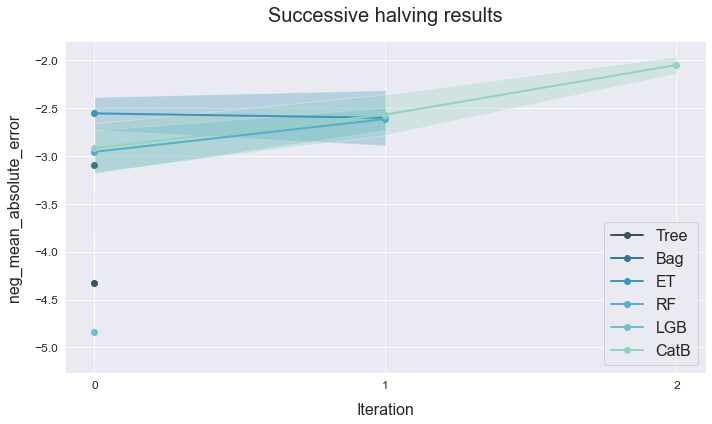

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()